In [2]:
import numpy as np
import scipy as sp
from PIL import Image

import matplotlib.pylab as plt
import matplotlib.animation as animation
from matplotlib.lines import Line2D

import scipy.stats as st
from sortedcontainers import SortedDict
from skimage.restoration import unwrap_phase

from IPython.display import HTML

import math
import random
from datetime import datetime
from scipy.optimize import curve_fit, minimize

import tqdm
import os
import fnmatch


In [3]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'plt', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [89]:
folder_path = "I:\\Honours-Project\\data\\40x 0_70NA\\10_09_19\\"

labels = []

imgs = ['NE00','NE03NE20']

for img in imgs:
    for i in range(2,30):
        labels.append(f'{img}_{i}')

ks_mat = np.zeros((len(labels),len(labels)))
        
for i in range(len(labels)):
    img_i = np.asarray(Image.open(f'{folder_path}{labels[i]}.tif'))
    for j in range(len(labels)):
        img_j = np.asarray(Image.open(f'{folder_path}{labels[j]}.tif'))
        ks,p = st.ks_2samp(img_i.flatten(),img_j.flatten())
        
        ks_mat[i][j] = ks

In [90]:
ks_mat.shape

(56, 56)

In [91]:
len(j_labels)

18

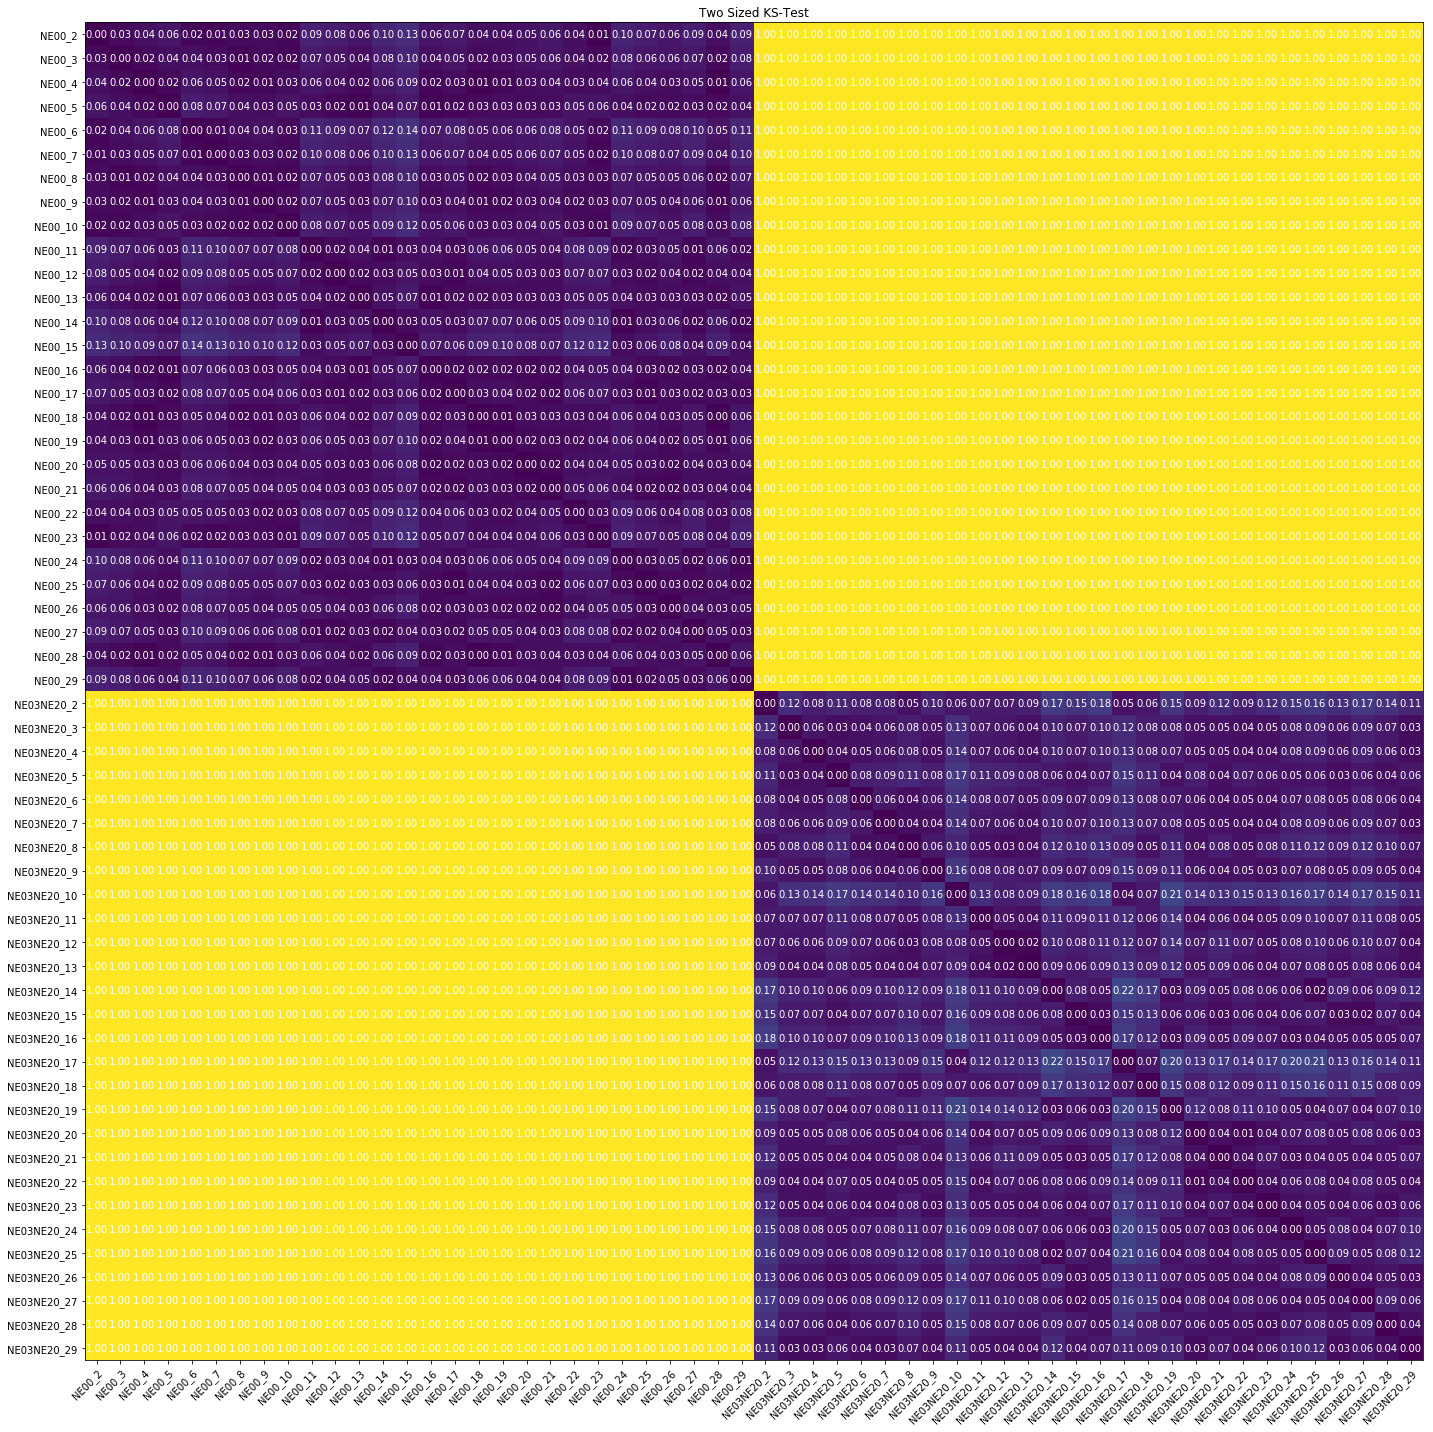

In [92]:
fig, ax = plt.subplots()
im = ax.imshow(ks_mat)

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, '%.2f' % ks_mat[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Two Sized KS-Test")
fig.tight_layout()
plt.show()

In [94]:
img_i = np.asarray(Image.open(f'{folder_path}NE03NE20_17.tif'))
img_j = np.asarray(Image.open(f'{folder_path}NE03NE20_14.tif'))
ks,p = st.ks_2samp(img_i.flatten(),img_j.flatten())

print(ks)

0.21600453317901236


### Normed

In [74]:
folder_path = "I:\\Honours-Project\\data\\40x 0_70NA\\10_09_19\\"

labels = []

ks_mat = np.zeros((18,18))
imgs = ['NE00','NE03NE20']

for img in imgs:
    for i in range(2,11):
        labels.append(f'{img}_{i}')

for i in range(len(labels)):
    img_i = np.asarray(Image.open(f'{folder_path}{labels[i]}.tif'))
    img_i = (img_i-np.min(img_i))/(np.max(img_i)-np.min(img_i))
    for j in range(len(labels)):
        img_j = np.asarray(Image.open(f'{folder_path}{labels[j]}.tif'))
        img_j = (img_j-np.min(img_j))/(np.max(img_j)-np.min(img_j))
        ks,p = st.ks_2samp(img_i.flatten(),img_j.flatten())
        
        ks_mat[i][j] = ks

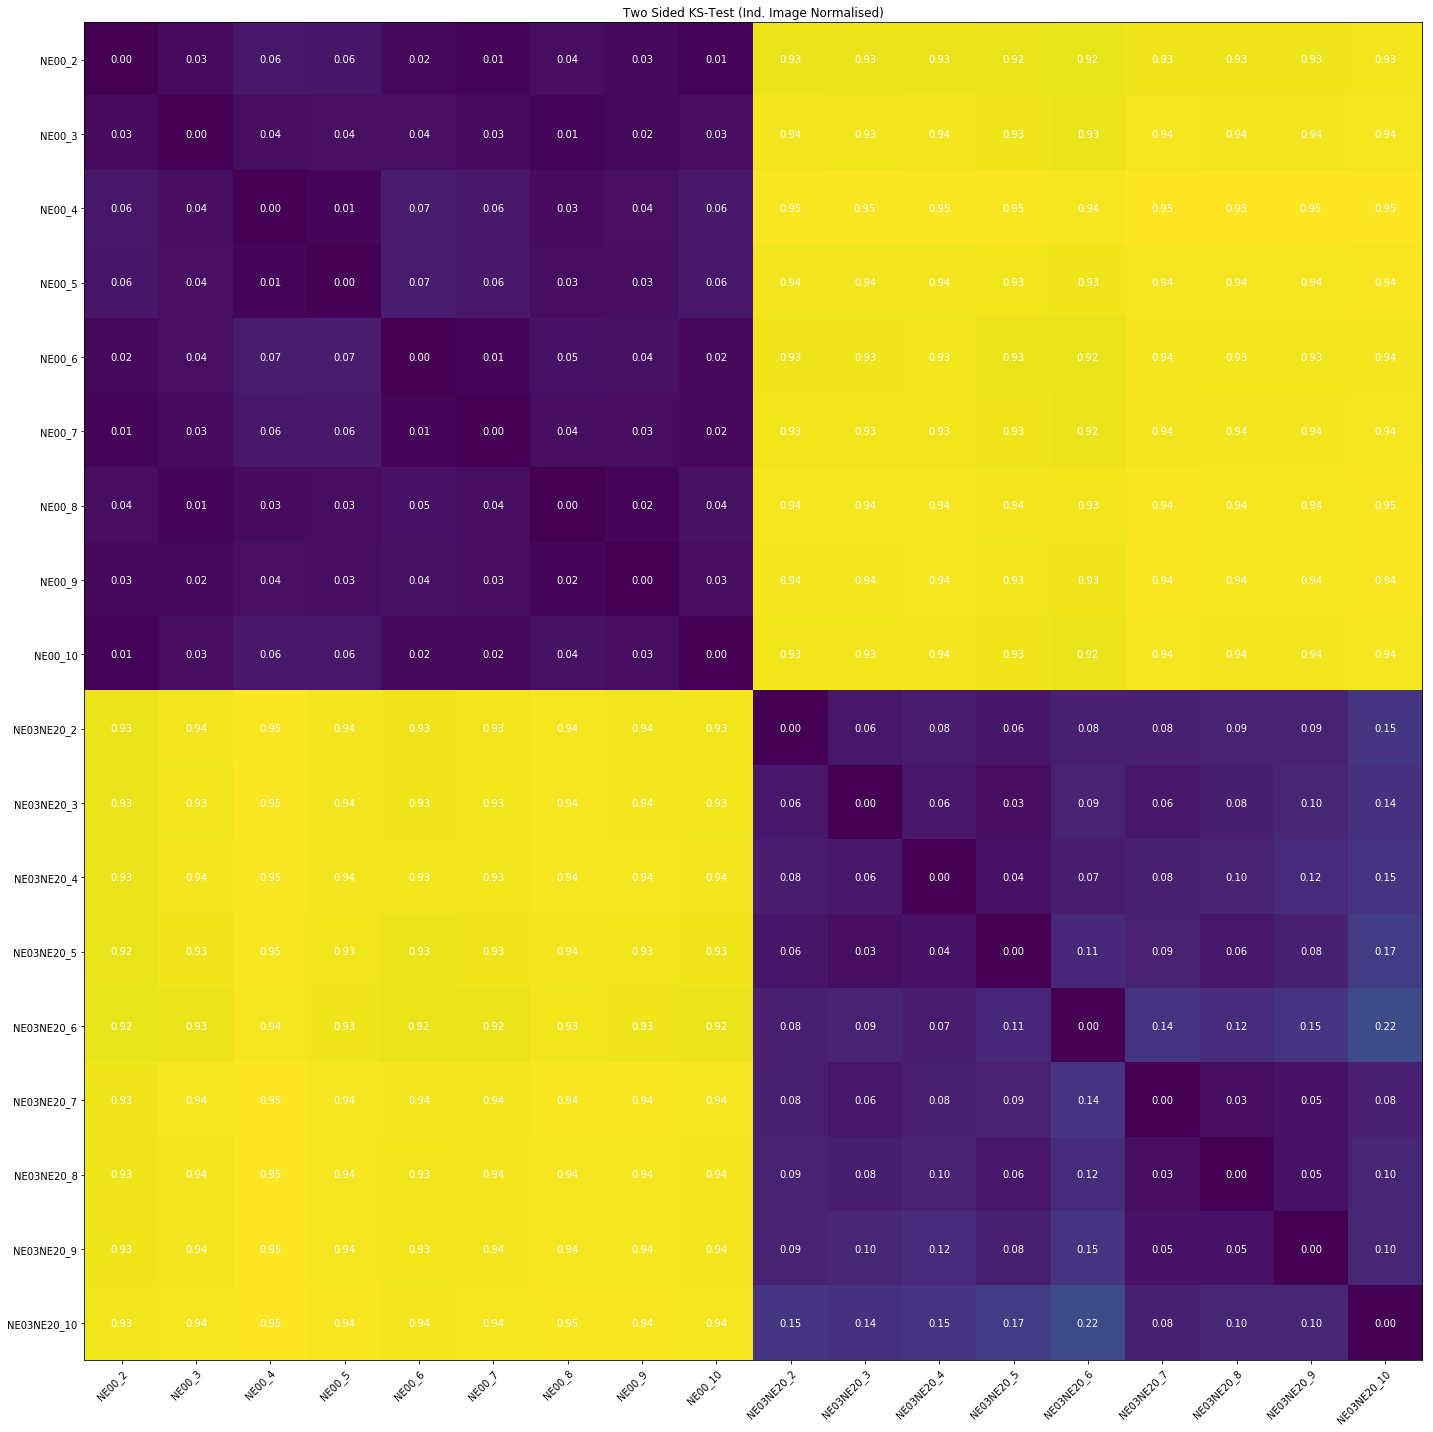

In [75]:
fig, ax = plt.subplots()
im = ax.imshow(ks_mat)

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, '%.2f' % ks_mat[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Two Sided KS-Test (Ind. Image Normalised)")
fig.tight_layout()
plt.show()

In [14]:
folder_path = "I:\\Honours-Project\\data\\40x 0_70NA\\02_09_2019\\"

labels = []

for file in os.listdir(folder_path):
    if fnmatch.fnmatch(file, '*.tif'):
        labels.append(file[:-4])

d1_ks_mat = np.zeros((len(labels),len(labels)))
        
for i in range(len(labels)):
    img_i = np.asarray(Image.open(f'{folder_path}{labels[i]}.tif'))
    img_i = (img_i-np.mean(img_i))/(np.std(img_i))
    for j in range(len(labels)):
        img_j = np.asarray(Image.open(f'{folder_path}{labels[j]}.tif'))
        img_j = (img_j-np.mean(img_j))/(np.std(img_j))
        ks,p = st.ks_2samp(img_i.flatten(),img_j.flatten())
        
        d1_ks_mat[i][j] = ks
        

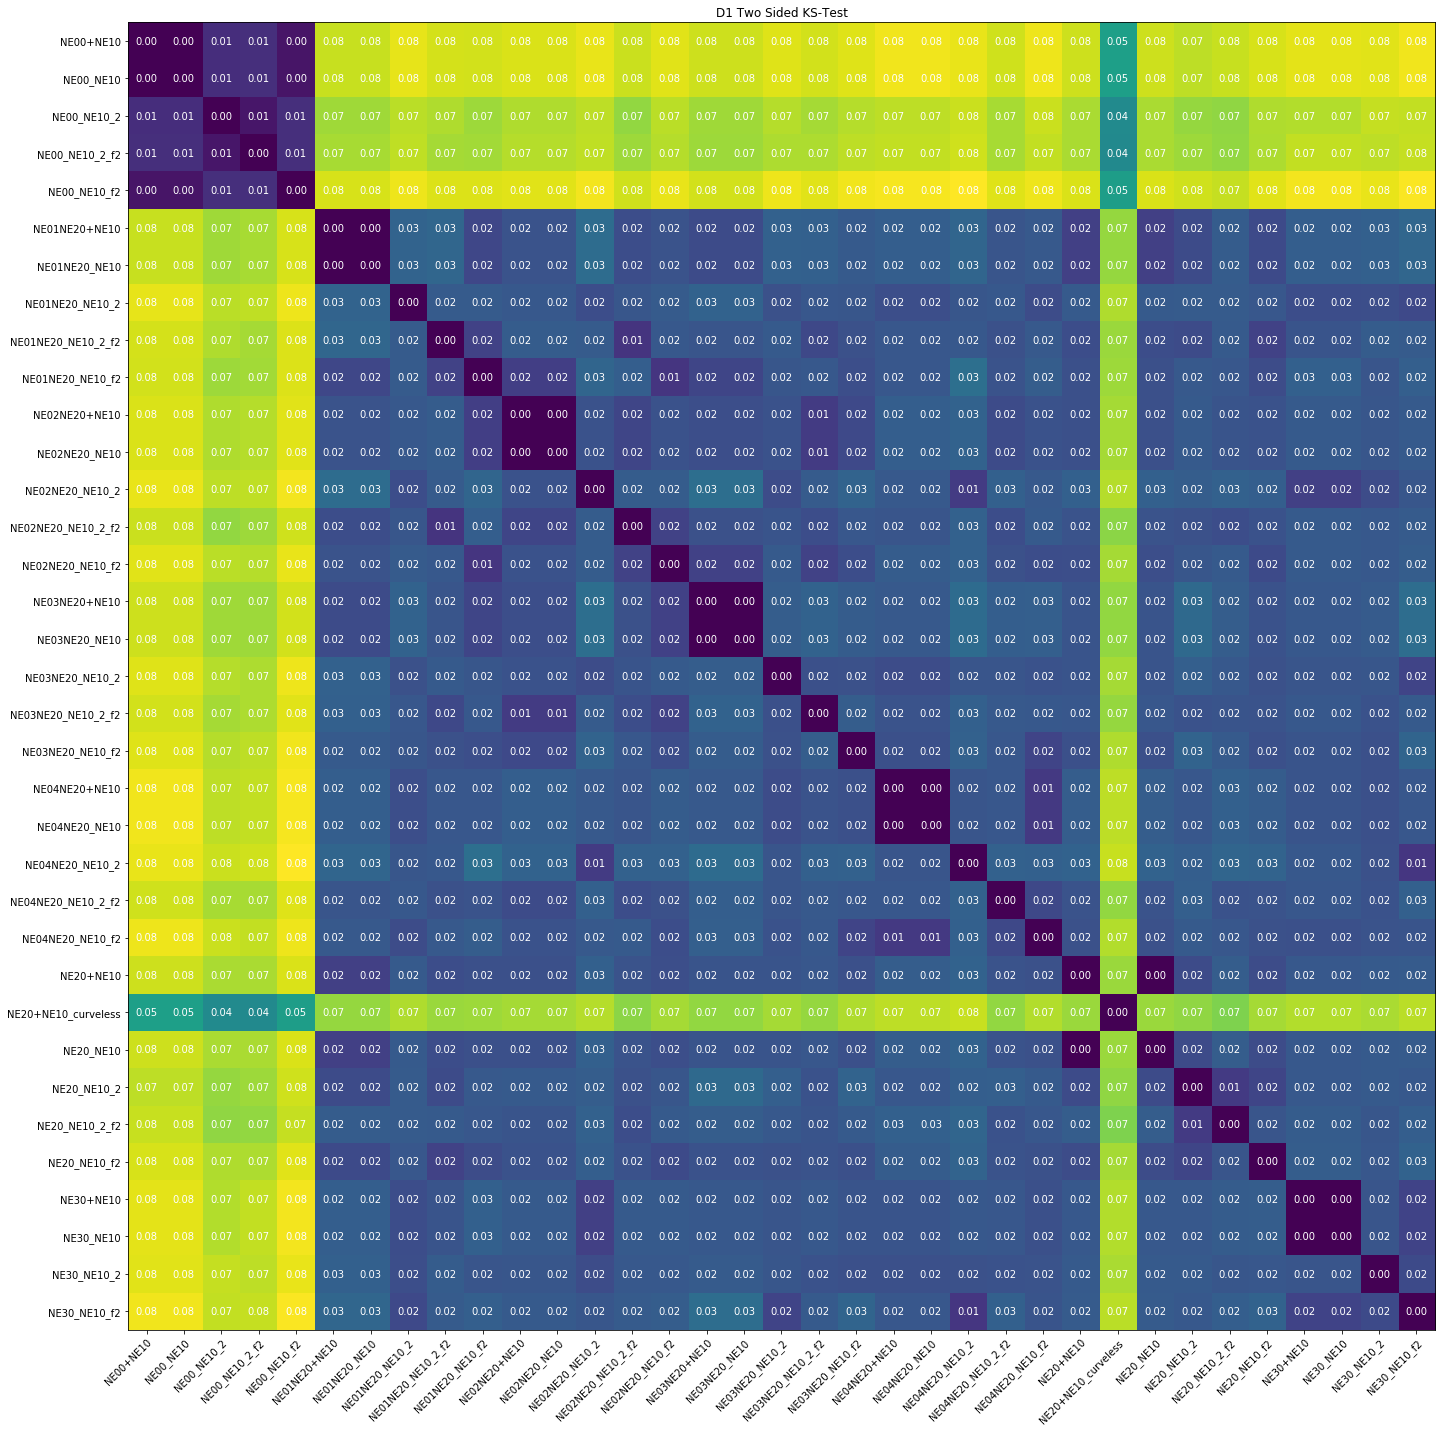

In [15]:
fig, ax = plt.subplots()
im = ax.imshow(d1_ks_mat)

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, '%.2f' % d1_ks_mat[i, j],
                       ha="center", va="center", color="w")

ax.set_title("D1 Two Sided KS-Test")
fig.tight_layout()
plt.show()

0.9999990354938272


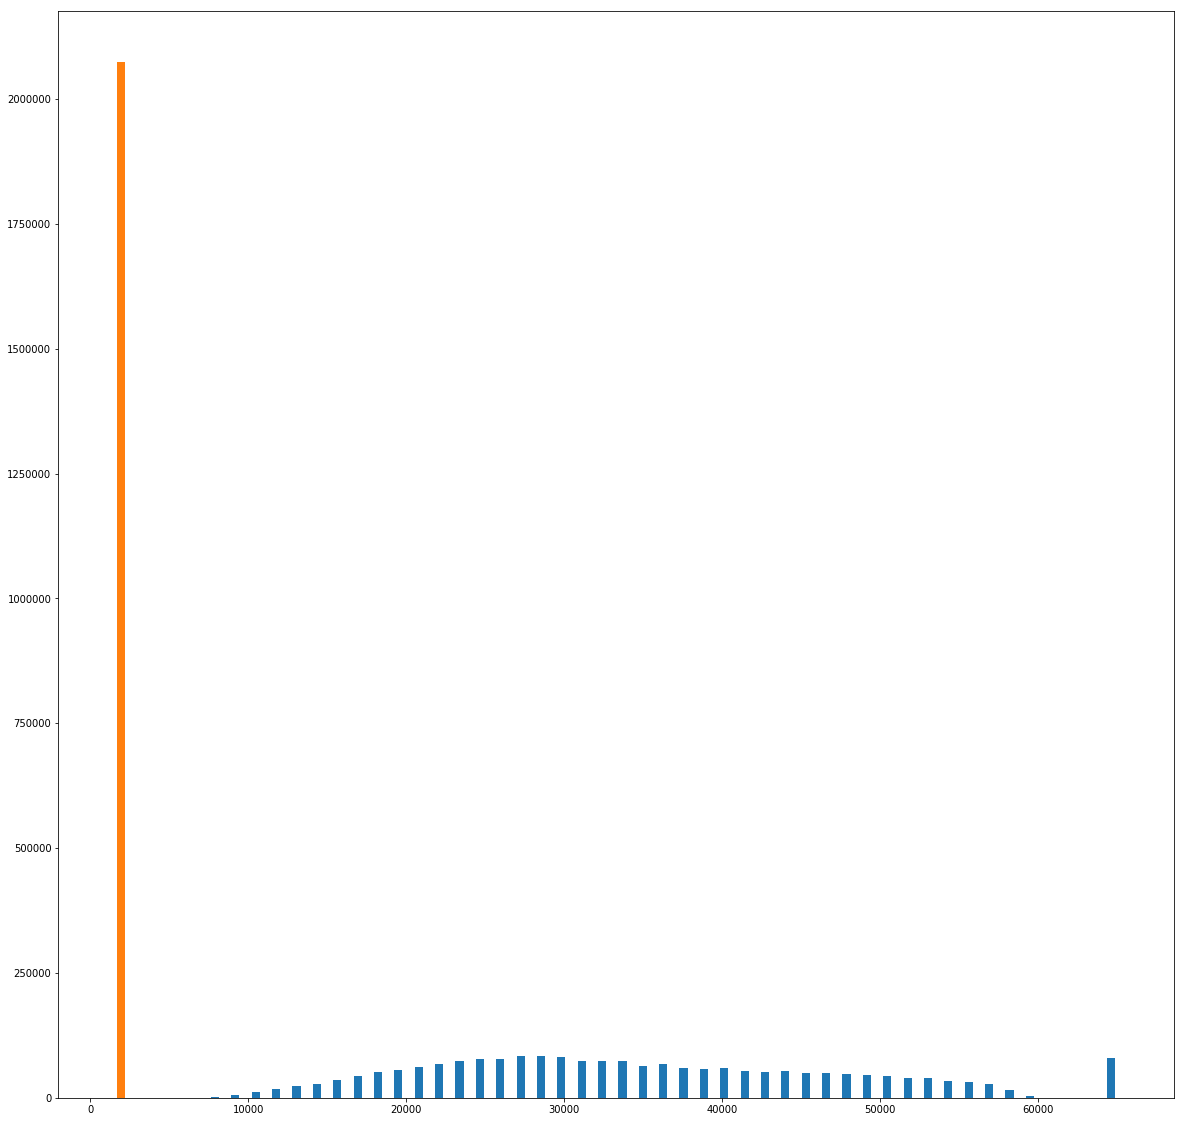

In [99]:
img_i = np.asarray(Image.open(f'{folder_path}NE00_14.tif'))
img_j = np.asarray(Image.open(f'{folder_path}NE03NE20_14.tif'))
ks,p = st.ks_2samp(img_i.flatten(),img_j.flatten())

plt.hist([img_i.flatten(),img_j.flatten()],50)
print(ks)

0.043577353395061635


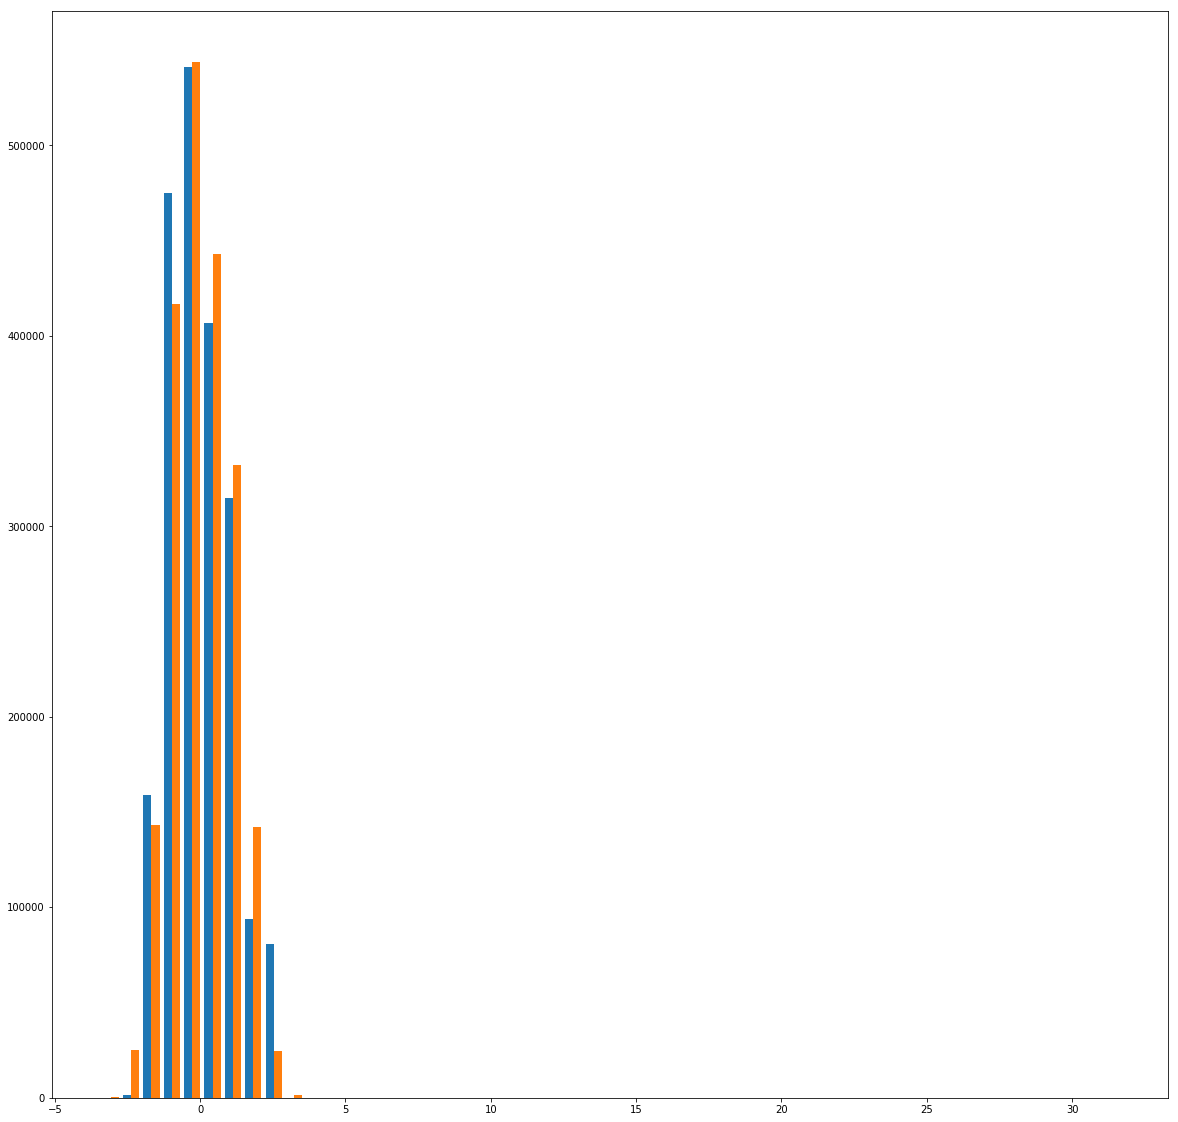

In [106]:
img_i = np.asarray(Image.open(f'{folder_path}NE00_14.tif'))
img_j = np.asarray(Image.open(f'{folder_path}NE03NE20_14.tif'))

#img_i = (img_i/np.std(img_i))*np.std(img_j)
#img_i = img_i + (np.mean(img_j) - np.mean(img_i))

img_i = (img_i-np.mean(img_i))/(np.std(img_i))
img_j = (img_j-np.mean(img_j))/(np.std(img_j))

ks,p = st.ks_2samp(img_i.flatten(),img_j.flatten())

plt.hist([img_i.flatten(),img_j.flatten()],50)
print(ks)

In [12]:
folder_path = "I:\\Honours-Project\\data\\40x 0_70NA\\10_09_19\\"

labels = []

imgs = ['NE00','NE03NE20']

for img in imgs:
    for i in range(1,30):
        labels.append(f'{img}_{i}')

ks_mat = np.zeros((len(labels),len(labels)))

img_mats = []

for lbl in labels:
    i = np.asarray(Image.open(f'{folder_path}{lbl}.tif'))
    i = (i-np.mean(i))/np.std(i)
    
    i = i.flatten()
    
    img_mats.append(i)

for i in range(len(labels)):
    img_i = img_mats[i]
    for j in range(len(labels)):
        img_j = img_mats[j]
        
        #img_i = (img_i/np.std(img_i))*np.std(img_j)
        #img_i = img_i + (np.mean(img_j) - np.mean(img_i))
        
        #img_i = (img_i-np.mean(img_i))/np.std(img_i)
        #img_j = (img_j-np.mean(img_j))/np.std(img_j)
        
        ks,p = st.ks_2samp(img_i,img_j)
        
        ks_mat[i][j] = ks

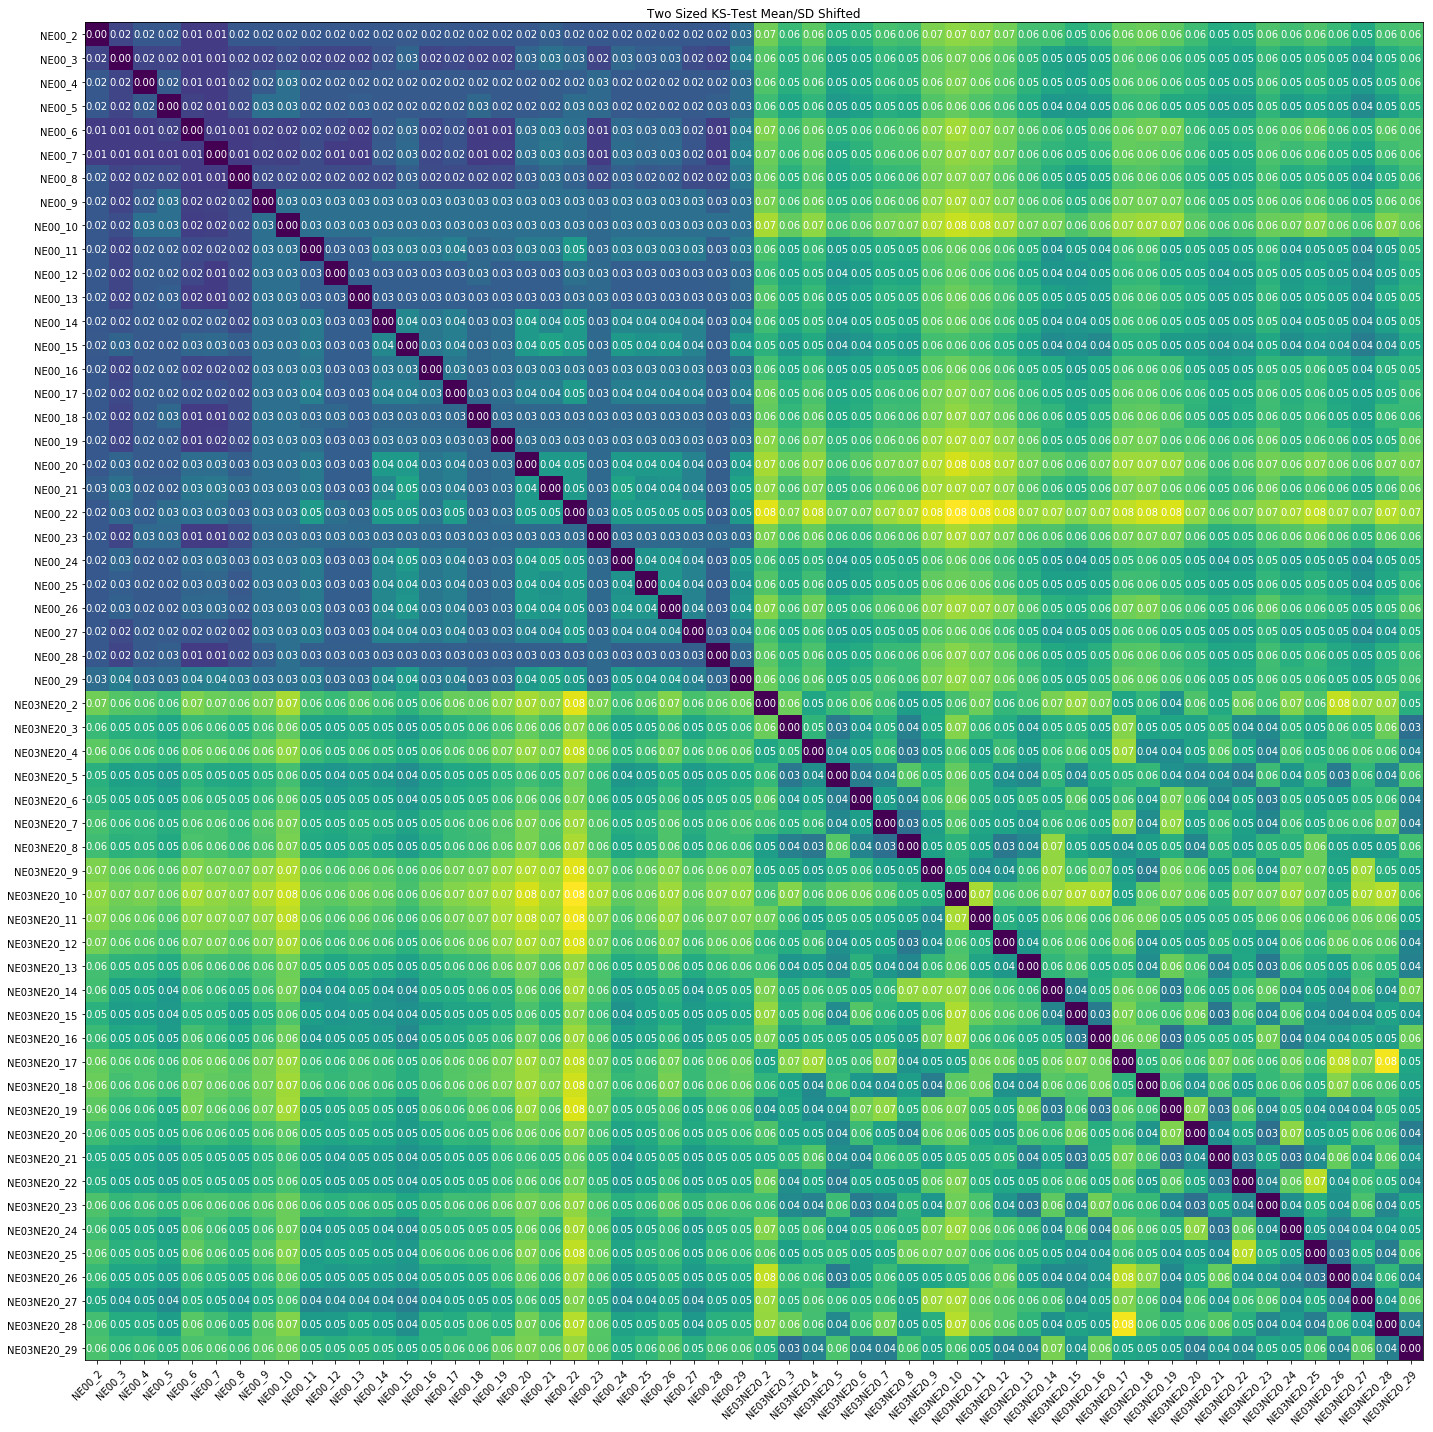

In [13]:
fig, ax = plt.subplots()
im = ax.imshow(ks_mat)

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, '%.2f' % ks_mat[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Two Sized KS-Test Mean/SD Shifted")
fig.tight_layout()
plt.show()

0.002855420524691371


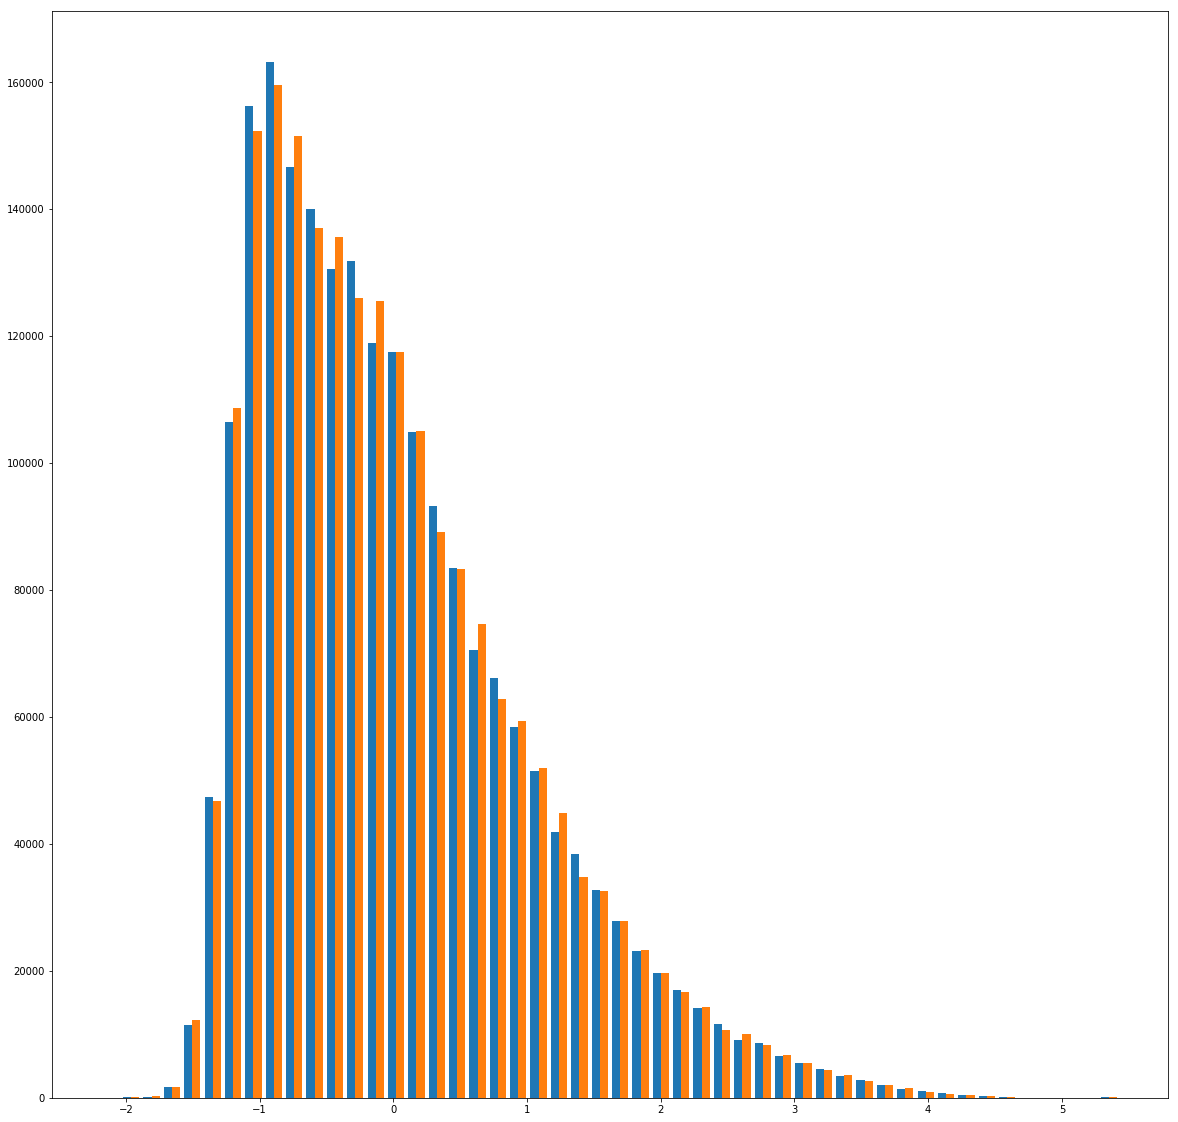

In [16]:
folder_path = folder_path = "I:\\Honours-Project\\data\\40x 0_70NA\\13_09_19\\"

img_i = np.asarray(Image.open(f'{folder_path}NE00_1.tif'))
img_j = np.asarray(Image.open(f'{folder_path}NE00_2.tif'))

#img_i = (img_i/np.std(img_i))*np.std(img_j)
#img_i = img_i + (np.mean(img_j) - np.mean(img_i))

img_i = (img_i-np.mean(img_i))/(np.std(img_i))
img_j = (img_j-np.mean(img_j))/(np.std(img_j))

ks,p = st.ks_2samp(img_i.flatten(),img_j.flatten())

plt.hist([img_i.flatten(),img_j.flatten()],50)
print(ks)

In [19]:
folder_path = "I:\\Honours-Project\\data\\40x 0_70NA\\13_09_19_2\\"

#img_i = np.asarray()

In [25]:
from skimage import io

im = io.imread(f'{folder_path}NE00.tif')
im.shape

im_noisy = io.imread(f'{folder_path}NE03NE20_2.tif')[0]
im_noisy.shape

(1080, 1920)

In [26]:
#img_NE10 = np.asarray(Image.open(f'{folder_path}NE03NE20_2.tif'))
im_noisy = (im_noisy-np.min(im_noisy))/(np.max(im_noisy)-np.min(im_noisy))

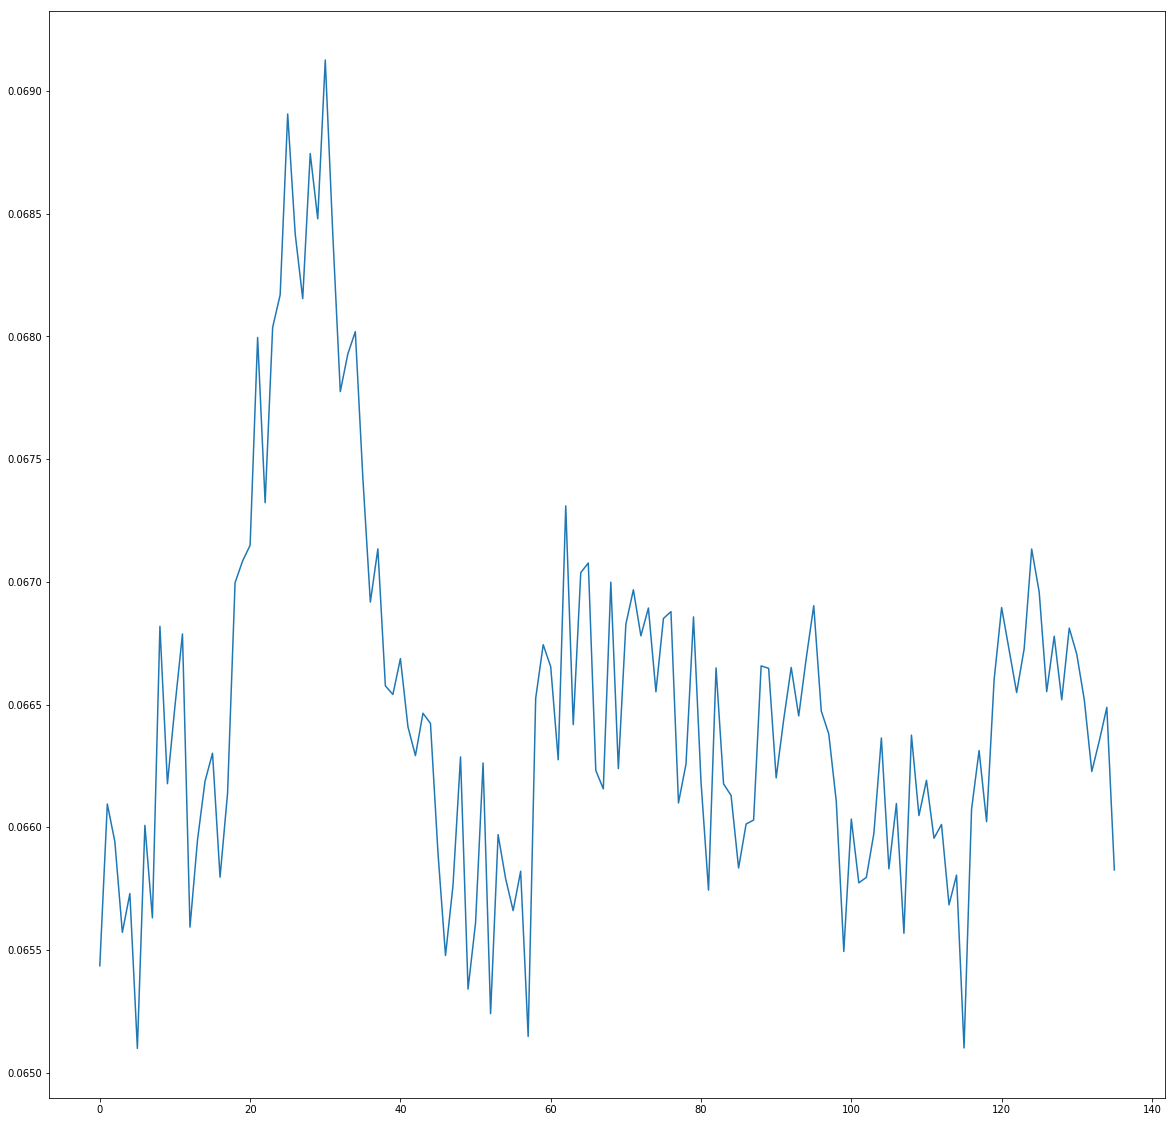

In [27]:
mse_array = []

for clean_img in im:
    clean_img = (clean_img-np.min(clean_img))/(np.max(clean_img)-np.min(clean_img))
    mse_array.append(((img_NE10 - clean_img)**2).mean())
    
plt.plot(mse_array)

In [28]:
mse_array.index(min(mse_array))

5